# Web Traffic Data Exploration
## with Linear Regression Analysis | By Sian Thompson

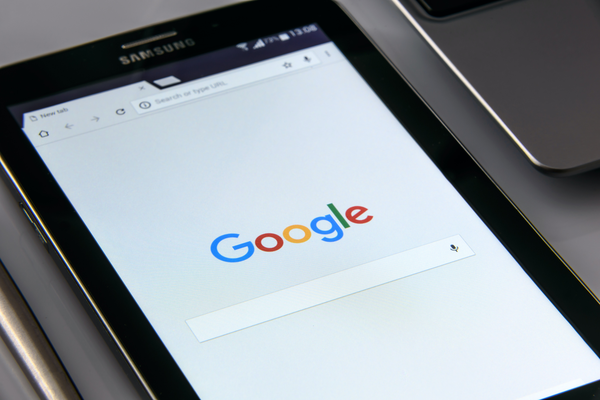

In [1]:
from PIL import Image               # to load images
from IPython.display import display # to display images

basewidth = 600
pil_img = Image.open('../assets/google_search_pic.jpg')
wpercent = (basewidth/float(pil_img.size[0]))
hsize = int((float(pil_img.size[1])*float(wpercent)))
pil_img = pil_img.resize((basewidth,hsize), Image.ANTIALIAS)

display(pil_img)

Photo by PhotoMIX Company from Pexels

# Part 1: Introduction to data set

- Exploring web traffic data, sourced from Google Analytics is helpful for understanding website peformance.

- Herein, an approach using python is presented for analysing key web metrics for certain insights; e.g. on how engagement for new and returning users differs on a monthly and yearly basis. 

- Beyond using scikit-learn for Linear Regression, alongside other data science packages such as pandas, ipy-widgets in Jupyter Notebook provide an intuitive means to gain quick predictive insights e.g. how many Sessions and Pageviews can be expected as a caveat, if there are x number of users. 


## Sampling Web Traffic Data

A custom Google Analytics Report with key web metrics was sourced in relation to the Google Merchandise Store, which sells Google branded merchandise. Anyone can access the demo account and it's a good opportunity to experiment with some real-world business data.

Google Analytics Demo Link: https://analytics.google.com/analytics/web/demoAccount

For this excercise, my custom report previously been set up with the following attributes in a Flat Table layout:

- Dimensions: 'All Users', 'New Users', 'Returning Users'
- Metrics: 'Users', 'Page Views', 'Sessions', 'Avg. Session Duration', 'Pages/Session', 'Bounce Rate'

Please note data could be sourced for the months Oct '14 to Jul '19. As various data was missing for the Dec '14 to May '15 and Jun '15 looked incomplete, data for Jan '15 to Jun '15 have been substituted with dummy figures. Data for 2014 has been removed for simplicity. Avg. Session Duration is provided in seconds for consistancy. I noticed the default in Google Analytics changed so that this metric now appears in HH:MM:SS. 

Data used for this analysis is available below:

In [2]:
import pandas as pd
from IPython.display import HTML
import base64

In [3]:
def create_download_button(title, filename):
    csv = pd.read_csv(filename)
    csv = csv.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [4]:
create_download_button('Download Web Traffic Data CSV', '../assets/GA_web_traffic_data_12_08_20.csv')

## Preview the Data

Let's use pandas to preview the dataframe for the file...

```python
import pandas as pd

web_traffic_df = pd.read_csv('GA_web_traffic_data_12_08_20.csv')
web_traffic_df.head(5)

```

In [5]:
web_traffic_df = pd.read_csv('../assets/GA_web_traffic_data_12_08_20.csv')
web_traffic_df.head(5)

,Month of Year,Date Range,Segment,Users,Page Views,Sessions,Avg. Session Duration,Pages/Session,Bounce Rate
0,201501,01-Jan-2015 - 31-Jul-2020,All Users,40748,218629,46589,139.32,4.69,46.81%
1,201501,01-Jan-2015 - 31-Jul-2020,New Users,40463,172619,40487,112.61,4.26,48.34%
2,201501,01-Jan-2015 - 31-Jul-2020,Returning Users,3606,46010,6102,316.50,7.54,36.63%
3,201502,01-Jan-2015 - 31-Jul-2020,All Users,31938,135909,36539,142.01,3.72,50.17%
4,201502,01-Jan-2015 - 31-Jul-2020,New Users,30518,104077,30526,115.12,3.41,52.35%


Data types for columns and the number of rows is also viewable:

```python
web_traffic_df.info()
```

In [6]:
web_traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month of Year          195 non-null    int64  
 1   Date Range             195 non-null    object 
 2   Segment                195 non-null    object 
 3   Users                  195 non-null    int64  
 4   Page Views             195 non-null    int64  
 5   Sessions               195 non-null    int64  
 6   Avg. Session Duration  195 non-null    float64
 7   Pages/Session          195 non-null    float64
 8   Bounce Rate            195 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.8+ KB


[Next Page: Part 2 - Preparation for Running Linear Regression Analysis](https://htmlpreview.github.io/?https://github.com/Kremzeeq/ga_linear_regression_project/blob/master/GA_Linear_Regression_Analysis_P2.html)

%%html
<style>
div.input {
    display:none;
}

</style>